In [8]:
import pandas as pd
import os
import glob
import plotly.io as pio

In [9]:
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [11]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file_path = '/content/drive/MyDrive/Assessment Data-20251028/all_cities_combined.csv'
df = pd.read_csv(file_path)
data = df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [14]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [15]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


Missing Value Analysis:
        Column  Missing_Percentage
13      Xylene           61.322001
3         PM10           37.723071
7          NH3           34.973418
12     Toluene           27.229014
11     Benzene           19.041008
14         AQI           15.851139
15  AQI_Bucket           15.851139
2        PM2.5           15.570079
6          NOx           14.171549
10          O3           13.619586
9          SO2           13.050692
5          NO2           12.139785
4           NO           12.129626
8           CO            6.972334


/tmp/ipython-input-2790128087.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




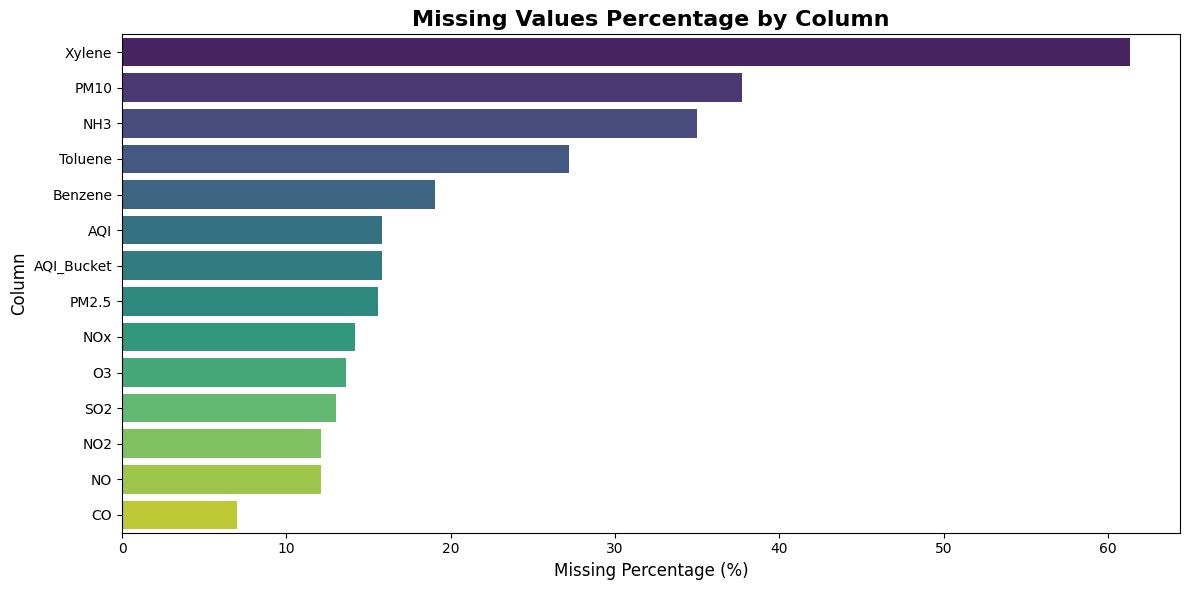

In [16]:
# Calculate missing percentage
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Value Analysis:")
print(missing_df[missing_df['Missing_Percentage'] > 0])
# Visualize missing values
plt.figure(figsize=(12, 6))
missing_df_plot = missing_df[missing_df['Missing_Percentage'] > 0]
sns.barplot(data=missing_df_plot, x='Missing_Percentage', y='Column', palette='viridis')
plt.title('Missing Values Percentage by Column', fontsize=16, fontweight='bold')
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Column', fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
df = df.sort_values(["City", "Date"])

df = df.groupby("City").apply(
    lambda g: g.interpolate(method="linear")
).reset_index(drop=True)

/tmp/ipython-input-3557907393.py:4: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipython-input-3557907393.py:4: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipython-input-3557907393.py:4: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipython-input-3557907393.py:4: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/tmp/ipython-input-3557907393.py:4: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(cop

In [18]:
for col in ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']:
    df[col] = df.groupby("City")[col].transform(
        lambda x: x.fillna(x.median())
    )


In [19]:
df = df.fillna(df.median(numeric_only=True))

In [20]:
def calc_sub_index(pm, breakpoints):
    for c_low, c_high, i_low, i_high in breakpoints:
        if c_low <= pm <= c_high:
            return ((i_high - i_low)/(c_high - c_low)) * (pm - c_low) + i_low
    return None

# AQI breakpoints (PM2.5 example)
pm25_bp = [
    (0, 30, 0, 50),
    (31, 60, 51, 100),
    (61, 90, 101, 200),
    (91, 120, 201, 300),
    (121, 250, 301, 400),
    (251, 500, 401, 500),
]

def compute_aqi(row):
    if pd.isna(row["PM2.5"]) and pd.isna(row["PM10"]):
        return None
    pm25_si = calc_sub_index(row["PM2.5"], pm25_bp) if not pd.isna(row["PM2.5"]) else None
    return pm25_si

df["AQI"] = df.apply(compute_aqi, axis=1)
df["AQI_Bucket"] = pd.cut(df["AQI"],
                          bins=[0,50,100,200,300,400,500],
                          labels=["Good","Satisfactory","Moderate","Poor","Very Poor","Severe"])

In [21]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df.loc[df[col] < 0, col] = None

In [22]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [23]:
df = df.dropna(subset=["AQI"])

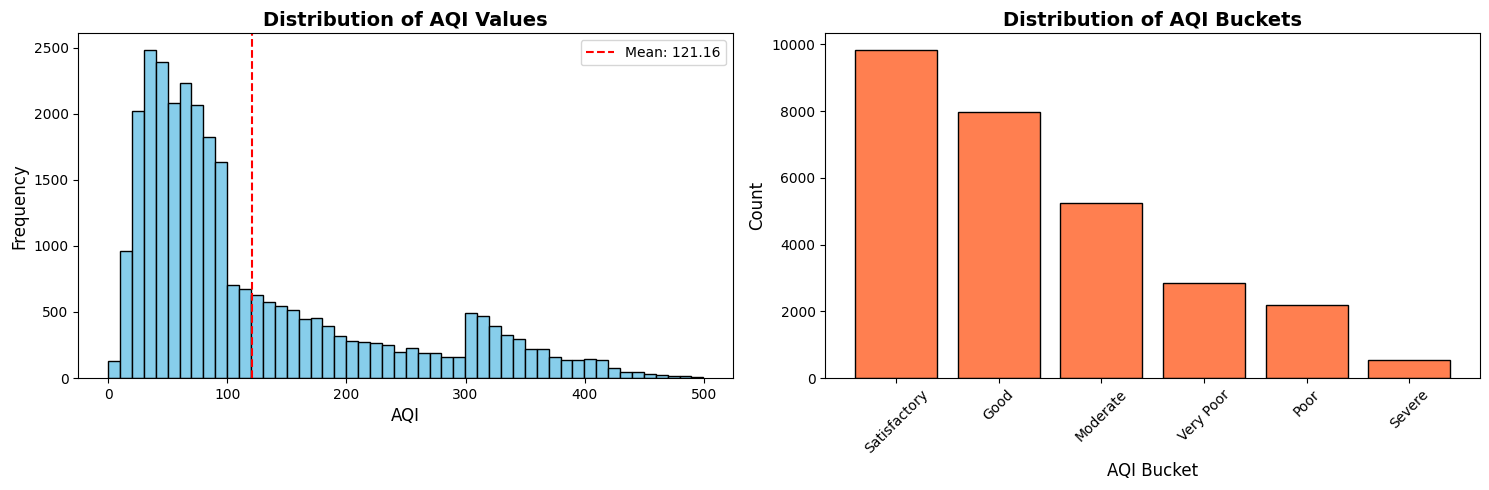


AQI Statistics:
Mean AQI: 121.16
Median AQI: 79.84
Min AQI: 0.07
Max AQI: 499.63


In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# AQI distribution
axes[0].hist(df['AQI'].dropna(), bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of AQI Values', fontsize=14, fontweight='bold')
axes[0].set_xlabel('AQI', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df['AQI'].mean(), color='red', linestyle='--', label=f'Mean: {df["AQI"].mean():.2f}')
axes[0].legend()

# AQI Bucket distribution
aqi_bucket_counts = df['AQI_Bucket'].value_counts()
axes[1].bar(aqi_bucket_counts.index, aqi_bucket_counts.values, color='coral', edgecolor='black')
axes[1].set_title('Distribution of AQI Buckets', fontsize=14, fontweight='bold')
axes[1].set_xlabel('AQI Bucket', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
print(f"\nAQI Statistics:")
print(f"Mean AQI: {df['AQI'].mean():.2f}")
print(f"Median AQI: {df['AQI'].median():.2f}")
print(f"Min AQI: {df['AQI'].min():.2f}")
print(f"Max AQI: {df['AQI'].max():.2f}")

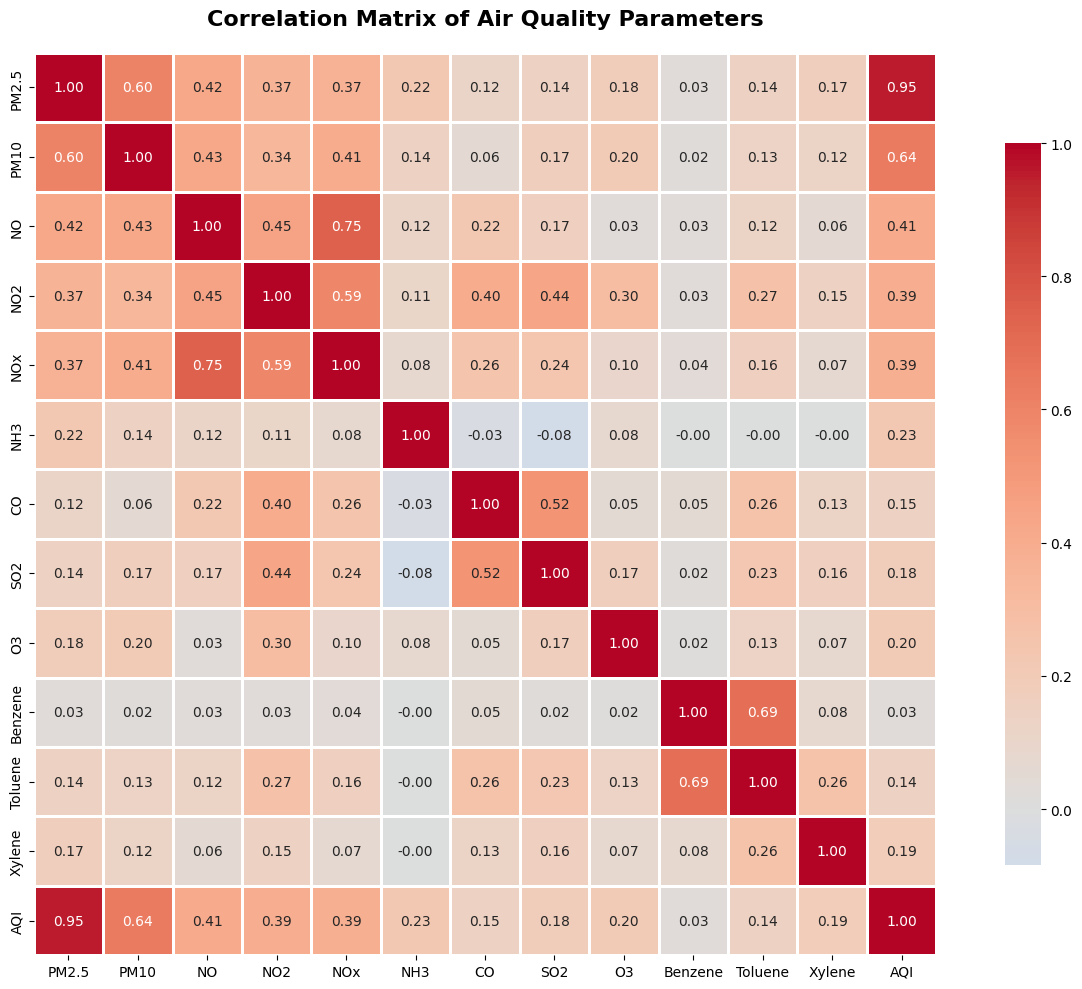


Correlation with AQI:
PM2.5     0.949707
PM10      0.636368
NO        0.414589
NO2       0.394595
NOx       0.387066
NH3       0.227864
O3        0.198625
Xylene    0.185339
SO2       0.177012
CO        0.145085
Name: AQI, dtype: float64


In [25]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Air Quality Parameters', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show strong correlations with AQI
if 'AQI' in correlation_matrix.columns:
    aqi_corr = correlation_matrix['AQI'].sort_values(ascending=False)
    print("\nCorrelation with AQI:")
    print(aqi_corr[1:11])

PM2.5 and PM10 are the major impacts for AQI


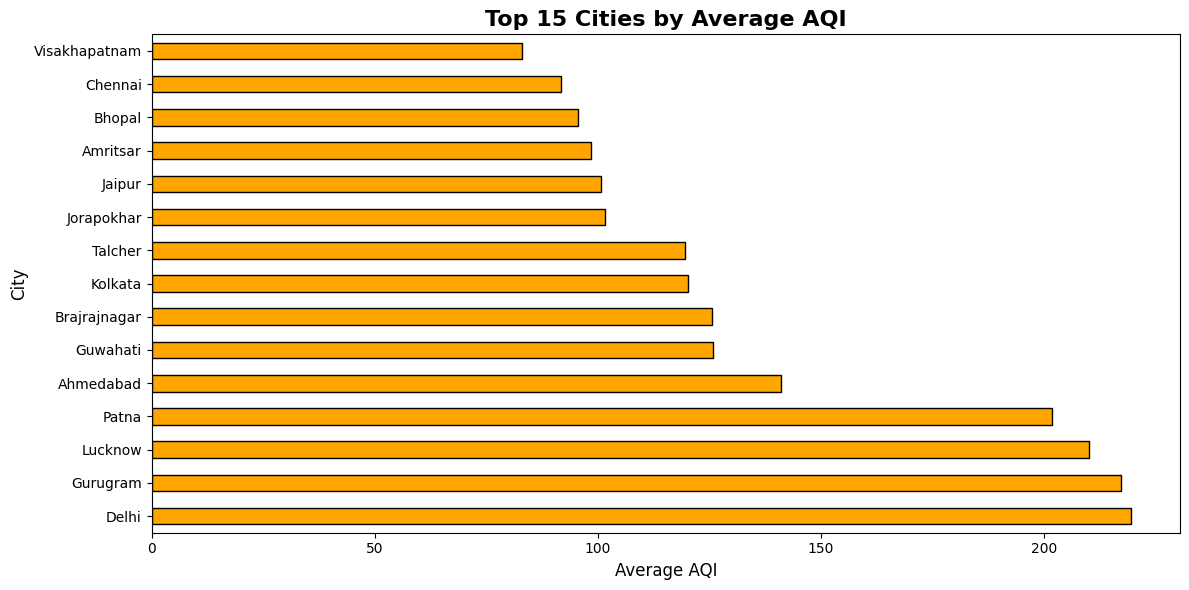

In [26]:
# Top 15 cities by average AQI
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
city_aqi.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Top 15 Cities by Average AQI', fontsize=16, fontweight='bold')
plt.xlabel('Average AQI', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2529554504.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




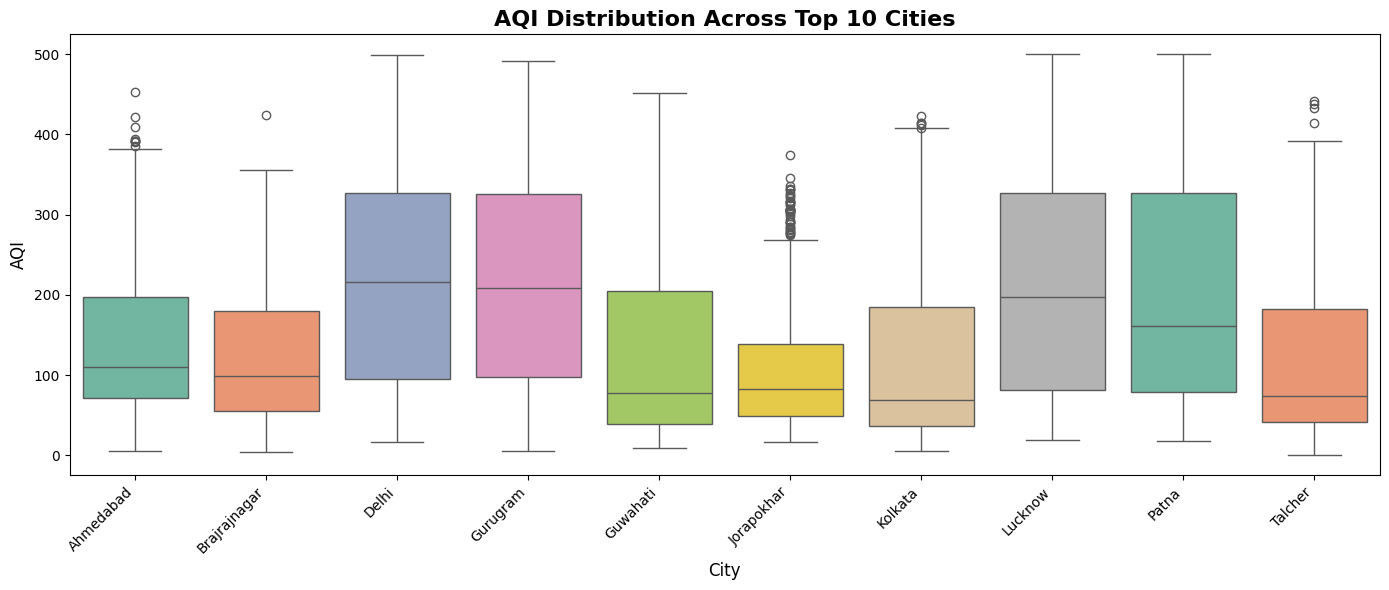

In [27]:
# AQI distribution across top cities
top_cities = city_aqi.head(10).index
df_top_cities = df[df['City'].isin(top_cities)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_cities, x='City', y='AQI', palette='Set2')
plt.title('AQI Distribution Across Top 10 Cities', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

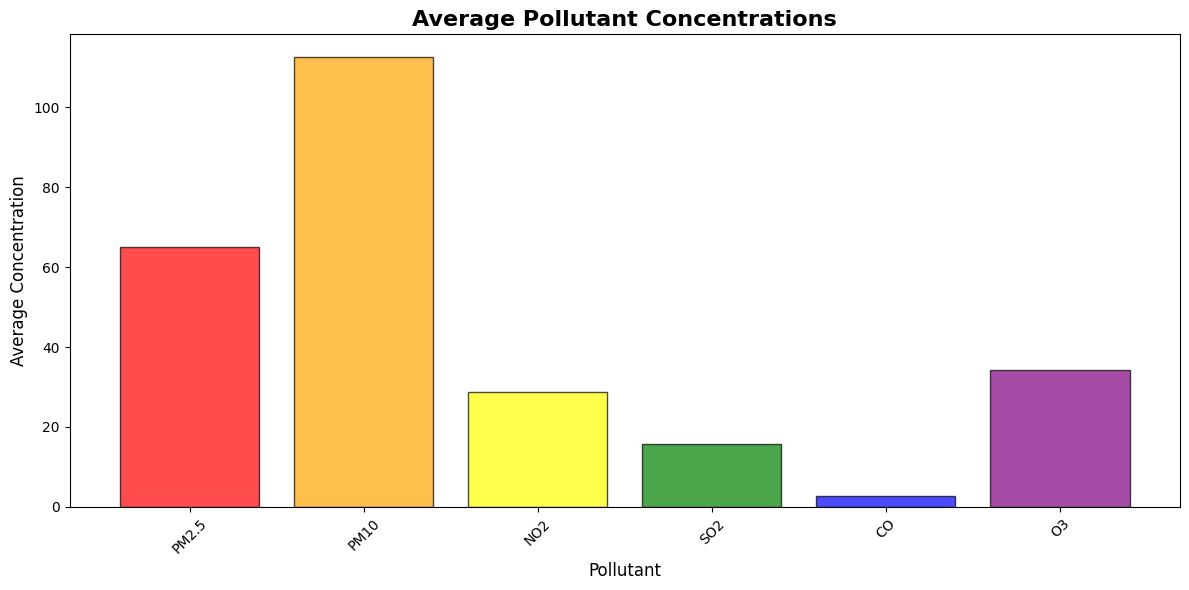

In [28]:
pollutant_avgs = {}
for pollutant in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']:
    if pollutant in df.columns:
        pollutant_avgs[pollutant] = df[pollutant].mean()

if pollutant_avgs:
    plt.figure(figsize=(12, 6))
    plt.bar(pollutant_avgs.keys(), pollutant_avgs.values(),
            color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'],
            edgecolor='black', alpha=0.7)
    plt.title('Average Pollutant Concentrations', fontsize=16, fontweight='bold')
    plt.ylabel('Average Concentration', fontsize=12)
    plt.xlabel('Pollutant', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [29]:
df1 = df.copy()

In [30]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1["Year"] = df1["Date"].dt.year
df1["Month"] = df1["Date"].dt.month
df1["Day"] = df1["Date"].dt.day
df1["DayOfWeek"] = df1["Date"].dt.dayofweek

In [31]:
df=df1.copy()

SEASONAL AQI ANALYSIS
          mean  median     std
Season                        
Autumn  121.12   80.10  104.38
Spring  121.60   78.78  105.70
Summer  120.63   80.38  105.63
Winter  121.53   78.14  107.69


/tmp/ipython-input-1501377248.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




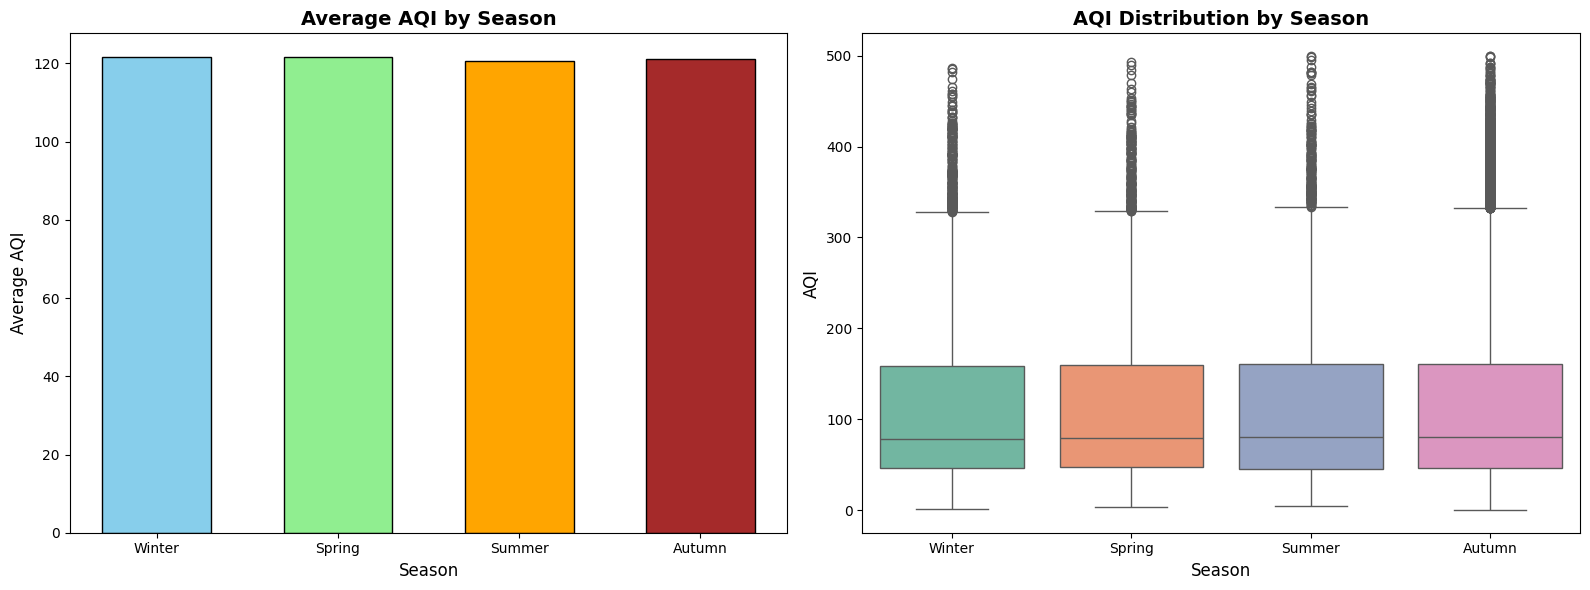

In [32]:
# Create season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Seasonal AQI analysis
seasonal_aqi = df.groupby('Season')['AQI'].agg(['mean', 'median', 'std']).round(2)
print("=" * 50)
print("SEASONAL AQI ANALYSIS")
print("=" * 50)
print(seasonal_aqi)

# Visualize seasonal patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Seasonal averages
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_data = df.groupby('Season')['AQI'].mean().reindex(season_order)
axes[0].bar(season_order, seasonal_data.values, color=['skyblue', 'lightgreen', 'orange', 'brown'],
            edgecolor='black', width=0.6)
axes[0].set_title('Average AQI by Season', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average AQI', fontsize=12)
axes[0].set_xlabel('Season', fontsize=12)

# Seasonal boxplots
sns.boxplot(data=df, x='Season', y='AQI', order=season_order, palette='Set2', ax=axes[1])
axes[1].set_title('AQI Distribution by Season', fontsize=14, fontweight='bold')
axes[1].set_ylabel('AQI', fontsize=12)
axes[1].set_xlabel('Season', fontsize=12)

plt.tight_layout()
plt.show()

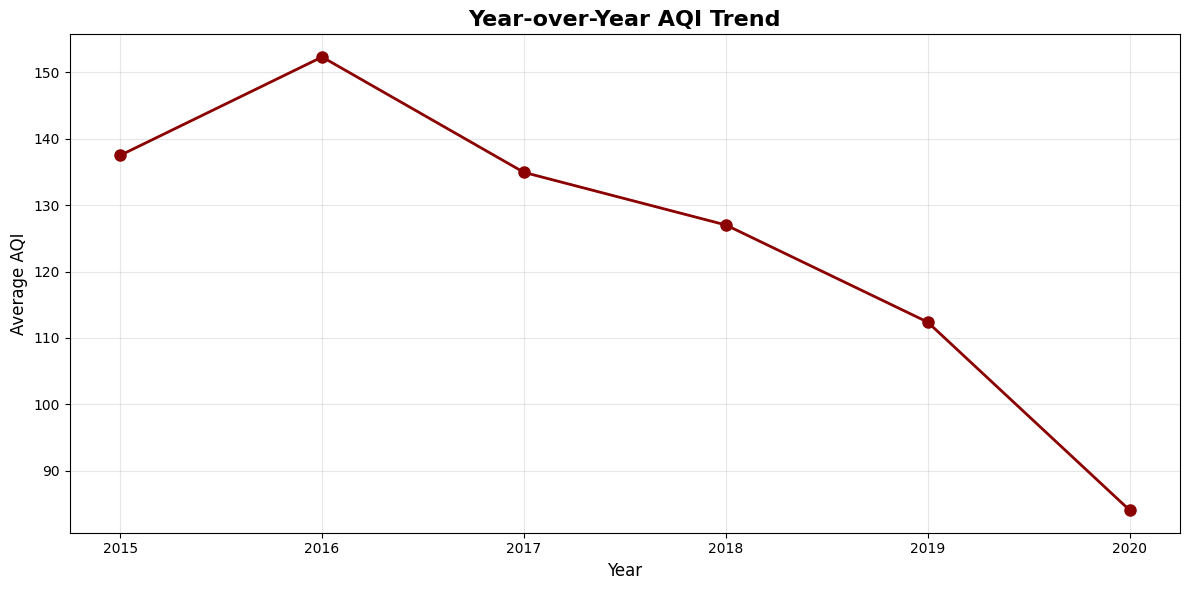


Yearly AQI Summary:
     Year         AQI
0  2015.0  137.484625
1  2016.0  152.279659
2  2017.0  134.919598
3  2018.0  127.008218
4  2019.0  112.390772
5  2020.0   84.111388


In [33]:
yearly_aqi = df.groupby('Year')['AQI'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_aqi['Year'], yearly_aqi['AQI'], marker='o', linewidth=2,
         markersize=8, color='darkred')
plt.title('Year-over-Year AQI Trend', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(yearly_aqi['Year'])
plt.tight_layout()
plt.show()

print("\nYearly AQI Summary:")
print(yearly_aqi)

In [34]:
# Create comprehensive city rankings
city_stats = df.groupby('City').agg({
    'AQI': ['mean', 'median', 'max', 'std'],
    'PM2.5': 'mean',
    'PM10': 'mean'
}).round(2)

city_stats.columns = ['_'.join(col).strip() for col in city_stats.columns.values]
city_stats = city_stats.sort_values('AQI_mean', ascending=False).head(15)

print("\n" + "=" * 50)
print("TOP 15 CITIES - COMPREHENSIVE STATISTICS")
print("=" * 50)
print(city_stats)


TOP 15 CITIES - COMPREHENSIVE STATISTICS
               AQI_mean  AQI_median  AQI_max  AQI_std  PM2.5_mean  PM10_mean
City                                                                        
Delhi            219.44      216.23   498.37   124.31      116.71     229.49
Gurugram         217.21      209.04   491.95   122.73      115.29     179.17
Lucknow          210.09      197.25   499.63   126.26      110.55      95.82
Patna            201.81      161.48   499.50   132.99      112.61     119.21
Ahmedabad        141.12      109.68   452.96    88.09       70.64     114.96
Guwahati         125.87       77.85   451.53   108.00       62.25     115.36
Brajrajnagar     125.48       98.41   423.98    85.03       62.59     121.41
Kolkata          120.22       69.20   422.37   112.24       62.70     113.13
Talcher          119.49       73.44   442.13   102.17       60.67     167.59
Jorapokhar       101.57       82.95   374.77    69.54       53.22     142.45
Jaipur           100.68       82.2

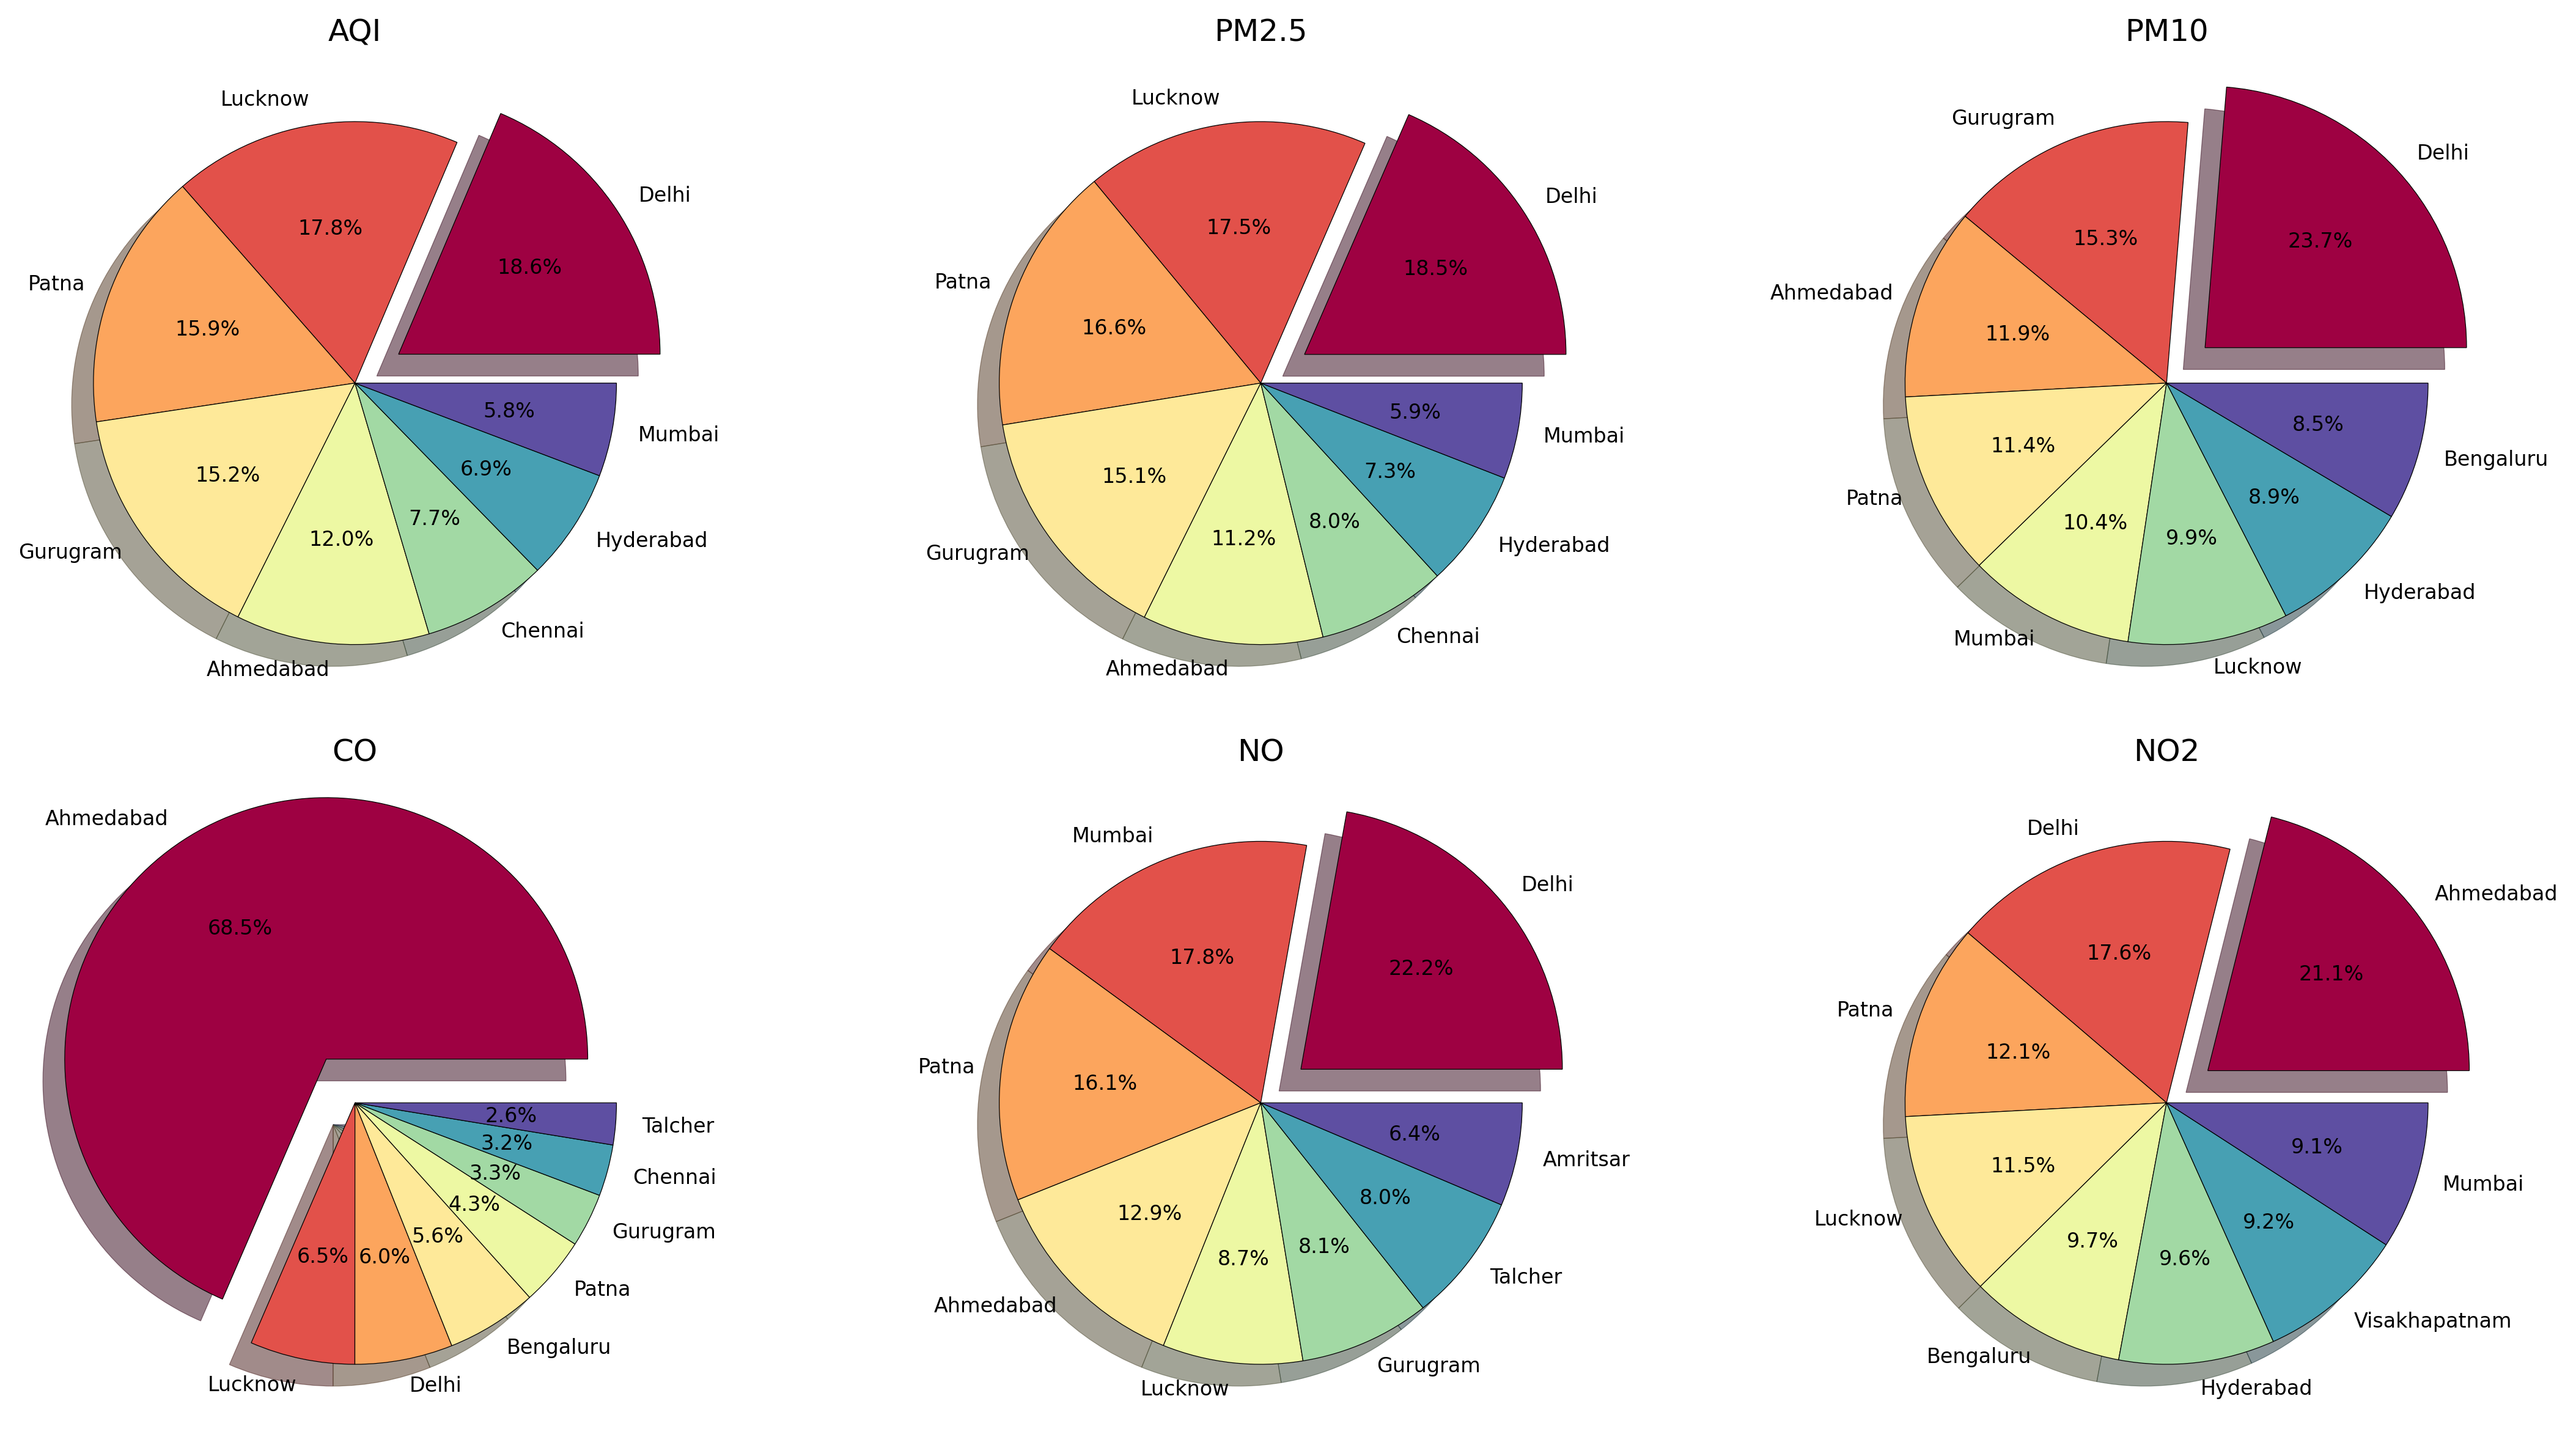

In [35]:
# For Ilustration use the original data and for
# most effective gases for AQI
cols = ['AQI', 'PM2.5', 'PM10', 'CO', 'NO', 'NO2']

# create a pie chart
cmap = plt.get_cmap('Spectral')
color = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = [0.2, 0, 0, 0, 0, 0, 0, 0]

# fit multiple charts in the display
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), dpi=300)

axes = axes.flatten()

# loop around all gasses for each city
for ax, col in zip(axes, cols):
    # Group the cities and select the 8 cities with the highest total
    x = df.groupby('City')[col].sum().sort_values(ascending=False)
    x = x.reset_index('City')

    top_cities = x[:8]
    sizes = top_cities[col].values
    labels = top_cities['City'].tolist()

    # set the pie chart
    wedges, texts, autotexts = ax.pie(sizes, shadow=True, autopct='%1.1f%%',
                                      colors=color, explode=explode,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.3},
                                      labels=labels)

    for text in texts:
        text.set_fontsize(8)

    for autotext in autotexts:
        autotext.set_fontsize(8)

    ax.set_title(f'{col}')

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


/tmp/ipython-input-2618925124.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2618925124.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2618925124.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




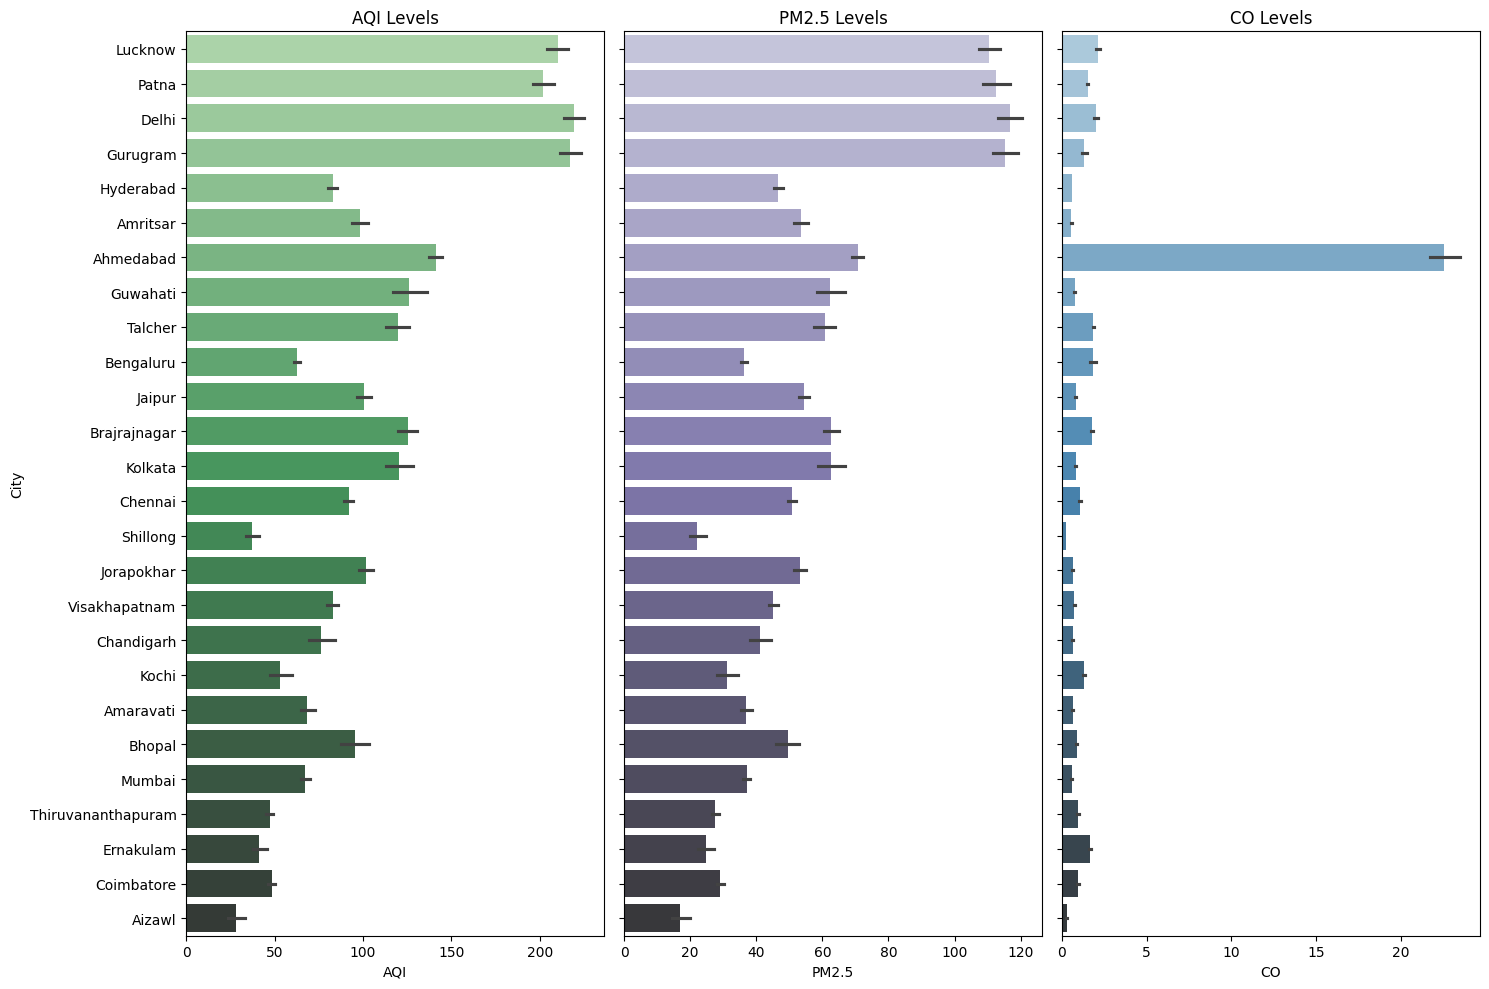

In [36]:
# Set the display
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

# Sort the data by AQI in ascending order
df_city_day_sorted = df.sort_values(by='AQI', ascending=False)

# Plot using the sorted data
sns.barplot(ax=axes[0], y='City', x='AQI', data=df_city_day_sorted, palette='Greens_d')
axes[0].set_title('AQI Levels')


sns.barplot(ax=axes[1], y='City', x='PM2.5', data=df_city_day_sorted, palette='Purples_d')
axes[1].set_title('PM2.5 Levels')

sns.barplot(ax=axes[2], y='City', x='CO', data=df_city_day_sorted, palette='Blues_d')
axes[2].set_title('CO Levels')

plt.tight_layout()
plt.show()


In [37]:
# Create a modeling dataset
df_model = df.copy()

# Select features for modeling
feature_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']
available_features = [col for col in feature_cols if col in df_model.columns]

# Target variable
target = 'AQI'

# Remove rows where target is missing
df_model = df_model.dropna(subset=[target])

In [38]:
# Prepare X and y
X = df_model[available_features].copy()
y = df_model[target].copy()

# Handle missing values in features using imputation
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

print(f"Modeling dataset shape: {X_imputed.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nFeatures used: {available_features}")

Modeling dataset shape: (28674, 8)
Target variable shape: (28674,)

Features used: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']


In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [40]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (22939, 8)
Test set size: (5735, 8)


In [41]:
results = []


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    }


In [43]:
from sklearn.linear_model import LinearRegression



lr_model = LinearRegression()
results.append(
    evaluate_model(
        "Linear Regression",
        lr_model,
        X_train_scaled,
        X_test_scaled,
        y_train,
        y_test
    )
)



Linear Regression
RMSE: 31.5621
MAE: 19.2578
R² Score: 0.9105


In [44]:
from sklearn.svm import SVR

svr_model = SVR(
    kernel='rbf',
    C=100,
    gamma='scale',
    epsilon=0.1
)

results.append(
    evaluate_model(
        "Support Vector Regressor",
        svr_model,
        X_train_scaled,
        X_test_scaled,
        y_train,
        y_test
    )
)




Support Vector Regressor
RMSE: 7.9280
MAE: 3.8238
R² Score: 0.9944


In [45]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    max_depth=12,
    random_state=42
)

results.append(
    evaluate_model(
        "Decision Tree",
        dt_model,
        X_train,
        X_test,
        y_train,
        y_test
    )
)



Decision Tree
RMSE: 0.0867
MAE: 0.0367
R² Score: 1.0000


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

results.append(
    evaluate_model(
        "Gradient Boosting",
        gb_model,
        X_train,
        X_test,
        y_train,
        y_test
    )
)



Gradient Boosting
RMSE: 0.2030
MAE: 0.1431
R² Score: 1.0000


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

results.append(
    evaluate_model(
        "Random Forest",
        rf_model,
        X_train,
        X_test,
        y_train,
        y_test
    )
)



Random Forest
RMSE: 0.0499
MAE: 0.0148
R² Score: 1.0000


In [48]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

results_df


,Model,RMSE,MAE,R2 Score
4,Random Forest,0.049868,0.014831,1.000000
2,Decision Tree,0.086722,0.036745,0.999999
3,Gradient Boosting,0.202974,0.143113,0.999996
1,Support Vector Regressor,7.927968,3.823771,0.994351
0,Linear Regression,31.562128,19.257764,0.910470


In [49]:
best_model_name = results_df.iloc[0]["Model"]
print(f"Best performing model: {best_model_name}")


Best performing model: Random Forest


DECIDED TO GO WITH RANDOM FOREST

In [52]:
X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Random Forest Results
RMSE: 0.0555
MAE: 0.0157
R² Score: 1.0000


In [55]:

model_dir = "/content/drive/MyDrive/Data Analysis"
os.makedirs(model_dir, exist_ok=True)


In [56]:
import joblib

model_path = f"{model_dir}/random_forest_aqi.pkl"
joblib.dump(rf_model, model_path)

print("Model saved at:", model_path)


Model saved at: /content/drive/MyDrive/Data Analysis/random_forest_aqi.pkl
